# Aula 6 - Regularização

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Regularização

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ml_utils import *

____
____
____

_____

## 1) Regularização

Na aula passada, vimos como aumentar a complexidade das hipóteses ao introduzir um novo espaço de features. No entanto, vimos que isso facilmente leva a overfitting.

Neste ponto, é muito importante que falemos sobre **regularização**.

O objetivo da regularização é **diminuir a complexidade** de modelos, de modo a evitar que particularidades da base de treino (ruídos) sejam aprendidos (ou seja, evitar overfitting!)

Uma outra forma de enxergar regularização: **diminuição do espaço de hipóteses!**

<img src=https://curso-r.github.io/main-intro-ml/slides/static/img/erro_treino_erro_teste.png width=500>

Trataremos, neste módulo, de duas importantíssimas técnicas de regularização, conhecidas como **Lasso (regularização L1)** e **Ridge (regularização L2)**.

Matematicamente, a regularização descreve um **problema de otimização vinculado**. Ou seja, com restrições.

> Problema de otimização: otimização da função de custo, que é o objetivo da aprendizagem, pra determinar o $\hat{\vec{b}}$
<br>
> Restrições: é o que determina se temos L1 (lasso) ou L2 (ridge)

Mas o que são essas restrições?

A ideia é bem simples: sem restrições algumas, temos um **espaço de hipóteses tipicamente infinito**.

Com tanta liberdade assim, a possibilidade de overfitting é acentuada, afinal, se tivermos um espaço de hipóteses suficientemente expressivo/complexo (isto é, com uma quantidade relativamente grande de parâmetros), permitir que o algoritmo de aprendizagem "escolha" qualquer uma das infinitas hipóteses, sem restrições, pode permitir que o overfitting ocorra.

> A regularização entra justamente ao **restringir o espaço de hipóteses acessíveis!**

Isso faz com que não tenhamos mais acesso ao espaço de hipóteses completo (tipicamente infinito), mas sim a **uma região delimitada** do espaço de hipóteses!

> Ex.: na regressão linear sem regularização, temos infinitos hperplanos acessíveis. Ao utilizar regularização, fazemos com que apenas alguns dos infinitos hiperplanos possam ser escolhidos, fazendo com que, efetivamente, alguns sejam impossíveis de ser escolhidos pelo algoritmo de aprendizagem.

Essa é uma ideia muito interessante, não é mesmo?

Mas uma pergunta natural é: como implementar isso matematicamente?

Para isso, é importante que introduzamos o conceito de **espaço de parâmetros**, que nada mais é que o conjunto de todos os vetores de parâmetros possíveis para a hipótese.

Ex.: na regressão linear simples, $ f_{H, \vec{b}} = b_0 + b_1 X $, de modo que o vetor de parâmetros é: $\vec{b} = \begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix}$.

Como $b_0$ e $b_1$ podem assumir qualquer valor real ($b_0, b_1 \in \mathbb{R}$), temos que o espaço de parâmetros é o **plano**, também conhecido como $\mathbb{R}^2$.

Já sabemos isso a essa altura, mas é importante reforçar que **um dado vetor de parâmetros determina unicamente uma dada hipótese fixada**. 

> Desta maneira, analisarmos o espaço de hipóteses ou espaço de parâmetros é totalmente correspondente!

E, de fato, para os propósitos da regularização, é operacionalmente mais fácil analisarmos o espaço de parâmetros!

> A regularização **limita o espaço de parâmetros acessíveis**, o que faz com que, consequentemente, o espaço de hipóteses seja correspondentemente limitado!

No nosso exemplo da regressão linear simples: o que a regularização irá fazer é **delimitar uma região de $\mathbb{R}^2$** acessivel aos vetores de parâmetros!

Dado isso, a diferença entre L1 e L2 está **na forma como o espaço de parâmetros é limitado**!

Recomendo fortemente vocês brincarem com [este widget](https://www.geogebra.org/m/zwrd2p9g) desenvolvido pelo aluno Diolan Godinho.

### Regressão linear (sem regularização)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/5408b0a7-85f3-4824-ad68-44867121ecb9.png width=800>

### L1 (Lasso)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/acabe9da-07ba-4337-b467-dd2701a40cc8.png width=900>

### L2 (Ridge)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/46eda310-fb2f-498b-b455-593183de1dd7.png width=900>

Para saber como relacionar $t$ com $\lambda$, veja [este post](https://stats.stackexchange.com/questions/259177/expressing-the-lasso-regression-constraint-via-the-penalty-parameter) ou então [este](https://stats.stackexchange.com/questions/90648/kkt-versus-unconstrained-formulation-of-lasso-regression) -- discussões bem matemáticas!

Observações importantes:

- $\lambda$ é um hiperparâmetro que controla a "força" da regularização<br><br>
- **L1 pode zerar coeficientes** - faz feature selection<br><br>
- **L2 apenas diminui o tamanho de coeficientes** - não faz feature selection<br><br>

<img src=https://ugc.futurelearn.com/uploads/assets/2b/fe/2bfe399e-503e-4eae-9138-a3d7da738713.png width=900>



Geometricamente:

<img src=https://www.astroml.org/_images/fig_lasso_ridge_1.png width=800>

No sklearn, é possível fazer um modelo de regressão linear regularizado facilmente com as classes respectivas:

- [Regularização L2/Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

- [Regularização L1/Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Há, no sklearn, também uma implementação para um tipo de regularização conhecida como **Elastic Net**:

<img src=https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png width=900>

A classe se chama [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)



Vamos utilizar regularização no dataset das casas, juntamente com as features polinomiais. Mas, antes, vamos visualizar a ação da regularização em um dataset mais simples!

> **IMPORTANTE**: como os métodos de regularização são baseados na norma do vetor de parâmetros, é muito importante que as features sejam escaladas para que os métodos funcionem bem!

Isso porque a escala das features irá influenciar a regularização aplicada ao parâmetro respectivo!

Para eliminar este efeito, escalar os dados é muito importante!

In [3]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Vamos visualizar concretamente como a regularização de fato simplifica a hipótese! Pra isso, considere os pontos a seguir:

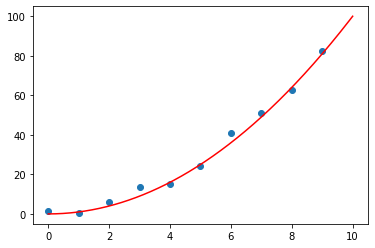

In [4]:
X = np.arange(10)
y = X**2

np.random.seed(42)
ruido = np.random.normal(0, 3, 10)
y = y + ruido

# isso é só pra poder treinar o modelo com 1 feature
X = X.reshape(-1, 1)

x_plot = np.linspace(0, 10, 1000)
y_plot = x_plot**2

plt.scatter(X, y)

plt.plot(x_plot, y_plot, color="r")

plt.show()

In [5]:
def reg_poly_plot(X, y, degree):
    
    # nestes caso APENAS, nao avaliaremos os modelos. Só queremos visualizar

    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)

    X_transf = pf.transform(X)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)

    X_transf =  mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)
    
    # =====================================
    
    calc_reg_metrics(reg_lin, X_transf, y, label="treino", plot=False, dist_resids=False, print_stuff=True)
    
    plot_reglin_model(reg_lin, X_transf[:, 0], y, X_transf[:, 0], y)

Número original de features: 1
Número de features no espaço transformado: 1

Métricas de avaliação (dados de treino):

R^2: 0.93
MAE: 5.58
RMSE: 7.24
MAPE: 135.69%


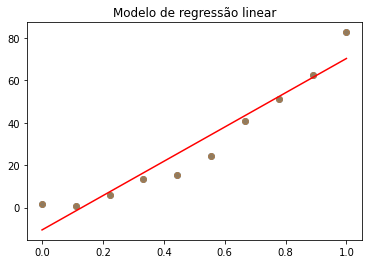

################################################################################
Número original de features: 1
Número de features no espaço transformado: 2

Métricas de avaliação (dados de treino):

R^2: 0.99
MAE: 1.79
RMSE: 2.03
MAPE: 39.13%


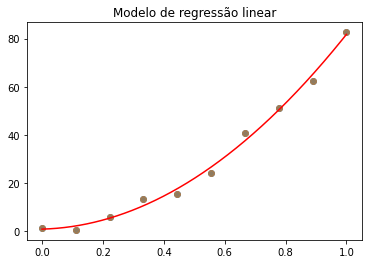

################################################################################
Número original de features: 1
Número de features no espaço transformado: 3

Métricas de avaliação (dados de treino):

R^2: 0.99
MAE: 1.79
RMSE: 2.03
MAPE: 39.23%


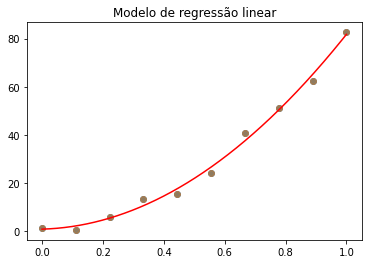

################################################################################
Número original de features: 1
Número de features no espaço transformado: 4

Métricas de avaliação (dados de treino):

R^2: 0.99
MAE: 1.78
RMSE: 2.03
MAPE: 34.99%


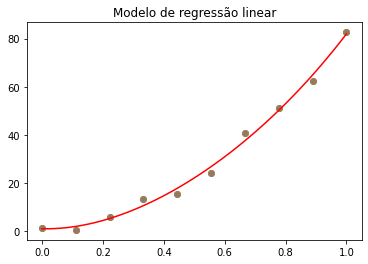

################################################################################
Número original de features: 1
Número de features no espaço transformado: 5

Métricas de avaliação (dados de treino):

R^2: 0.99
MAE: 1.78
RMSE: 2.02
MAPE: 41.12%


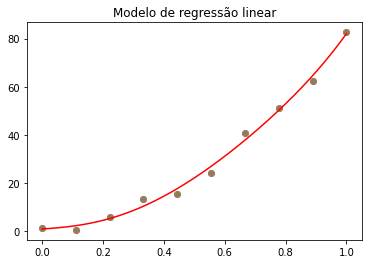

################################################################################
Número original de features: 1
Número de features no espaço transformado: 6

Métricas de avaliação (dados de treino):

R^2: 1.00
MAE: 0.88
RMSE: 1.07
MAPE: 15.50%


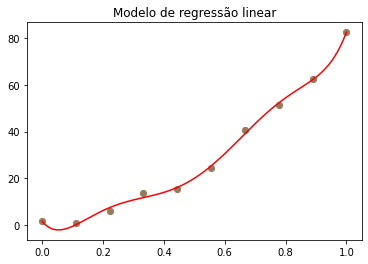

################################################################################
Número original de features: 1
Número de features no espaço transformado: 7

Métricas de avaliação (dados de treino):

R^2: 1.00
MAE: 0.88
RMSE: 1.06
MAPE: 13.07%


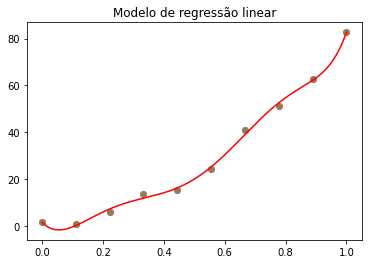

################################################################################
Número original de features: 1
Número de features no espaço transformado: 8

Métricas de avaliação (dados de treino):

R^2: 1.00
MAE: 0.01
RMSE: 0.01
MAPE: 0.07%


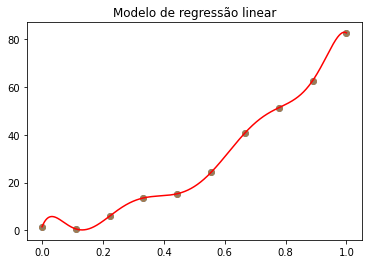

################################################################################
Número original de features: 1
Número de features no espaço transformado: 9

Métricas de avaliação (dados de treino):

R^2: 1.00
MAE: 0.00
RMSE: 0.00
MAPE: 0.00%


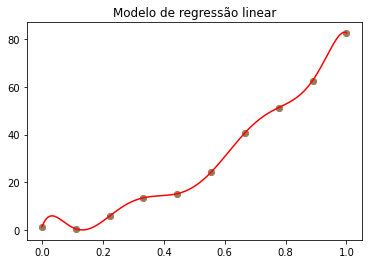

################################################################################
Número original de features: 1
Número de features no espaço transformado: 10

Métricas de avaliação (dados de treino):

R^2: 1.00
MAE: 0.00
RMSE: 0.00
MAPE: 0.00%


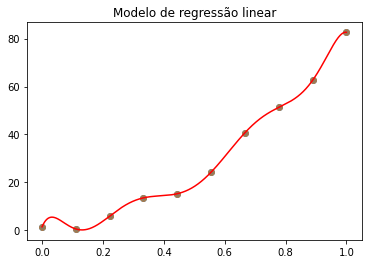

################################################################################


In [6]:
for grau in range(1, 11):
    
    reg_poly_plot(X, y, grau)
    
    print("#"*80)

Agora, vamos regularizar!

In [7]:
def calc_y_plot(modelo, x_plot):
    
    y_plot = modelo.intercept_
    
    for n, b_n in enumerate(modelo.coef_):

        y_plot = y_plot + b_n*(x_plot**(n+1))
        
    return y_plot

In [8]:
# pra ficar mais fácil de ver os parâmetros, vamos fixar duas casas decimais
np.set_printoptions(formatter={'float': lambda x: "{:.2f}".format(x)})

def reg_poly_regularized_plot(X, y, degree):
    
    # nestes caso APENAS, nao avaliaremos os modelos. Só queremos visualizar

    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)

    X_transf = pf.transform(X)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)

    X_transf =  mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)
    
    reg_l1 = Lasso(alpha=1).fit(X_transf, y)
    
    reg_l2 = Ridge(alpha=1).fit(X_transf, y)
    
    print(f"\nParâmetros modelo não regularizado:\n{reg_lin.intercept_:.2f}\n{reg_lin.coef_}")
    print(f"\nParâmetros modelo com L1 (Lasso):\n{reg_l1.intercept_:.2f}\n{reg_l1.coef_}")
    print(f"\nParâmetros modelo com L2 (Ridge):\n{reg_l2.intercept_:.2f}\n{reg_l2.coef_}")

    # =====================================

    print("\nModelo treinado:")
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].scatter(X_transf[:, 0], y)
    axs[1].scatter(X_transf[:, 0], y)

    x_plot = np.linspace(X_transf[:, 0].min(), X_transf[:, 0].max(), 1000)

    y_plot_reg_lin = calc_y_plot(reg_lin, x_plot)
    axs[0].plot(x_plot, y_plot_reg_lin, color="r", label="RL", ls=":")
    axs[1].plot(x_plot, y_plot_reg_lin, color="r", label="RL", ls=":")
    
    y_plot_reg_l1 = calc_y_plot(reg_l1, x_plot)
    axs[0].plot(x_plot, y_plot_reg_l1, color="orange", label="L1")
    
    y_plot_reg_l2 = calc_y_plot(reg_l2, x_plot)
    axs[1].plot(x_plot, y_plot_reg_l2, color="green", label="L2")
    
    axs[0].legend()
    axs[1].legend()
    plt.show()

Número original de features: 1
Número de features no espaço transformado: 1

Parâmetros modelo não regularizado:
-10.56
[80.81]

Parâmetros modelo com L1 (Lasso):
-5.65
[71.00]

Parâmetros modelo com L2 (Ridge):
9.46
[40.78]

Modelo treinado:


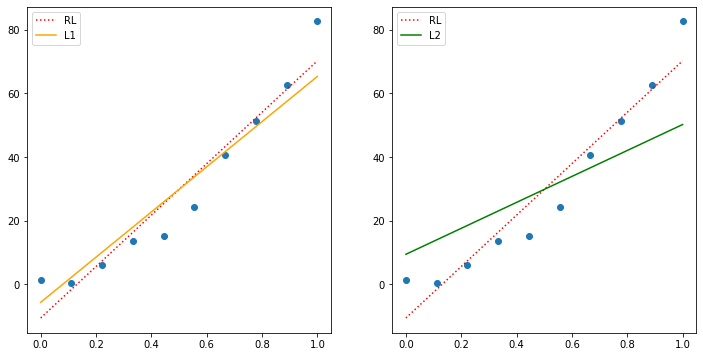

################################################################################

Número original de features: 1
Número de features no espaço transformado: 2

Parâmetros modelo não regularizado:
0.92
[3.34 77.48]

Parâmetros modelo com L1 (Lasso):
4.70
[0.00 71.47]

Parâmetros modelo com L2 (Ridge):
6.50
[25.81 29.66]

Modelo treinado:


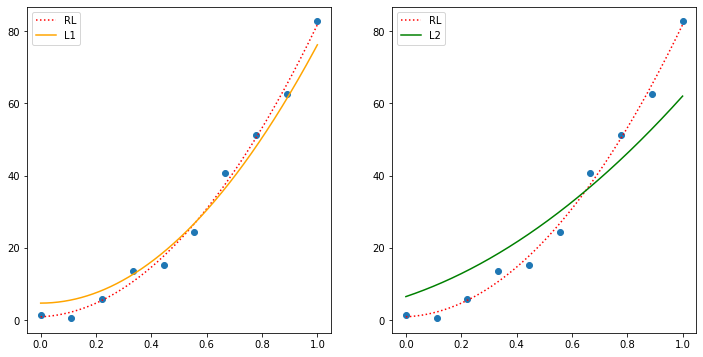

################################################################################

Número original de features: 1
Número de features no espaço transformado: 3

Parâmetros modelo não regularizado:
0.91
[3.49 77.07 0.27]

Parâmetros modelo com L1 (Lasso):
4.70
[0.00 71.47 0.00]

Parâmetros modelo com L2 (Ridge):
6.38
[19.83 21.75 21.22]

Modelo treinado:


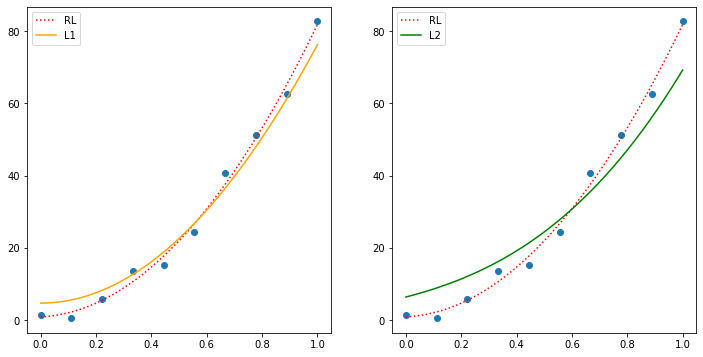

################################################################################

Número original de features: 1
Número de features no espaço transformado: 4

Parâmetros modelo não regularizado:
1.07
[-2.81 108.89 -50.76 25.51]

Parâmetros modelo com L1 (Lasso):
4.70
[0.00 71.47 0.00 0.00]

Parâmetros modelo com L2 (Ridge):
6.71
[17.24 17.85 16.69 15.39]

Modelo treinado:


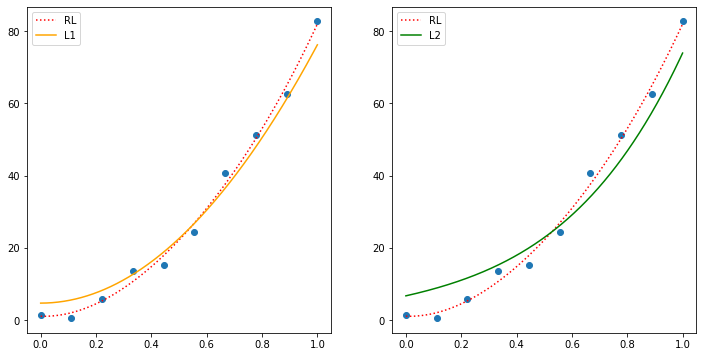

################################################################################

Número original de features: 1
Número de features no espaço transformado: 5

Parâmetros modelo não regularizado:
0.94
[9.07 9.88 229.10 -295.27 128.32]

Parâmetros modelo com L1 (Lasso):
4.70
[0.00 71.47 0.00 0.00 0.00]

Parâmetros modelo com L2 (Ridge):
7.04
[16.07 15.83 14.19 12.60 11.28]

Modelo treinado:


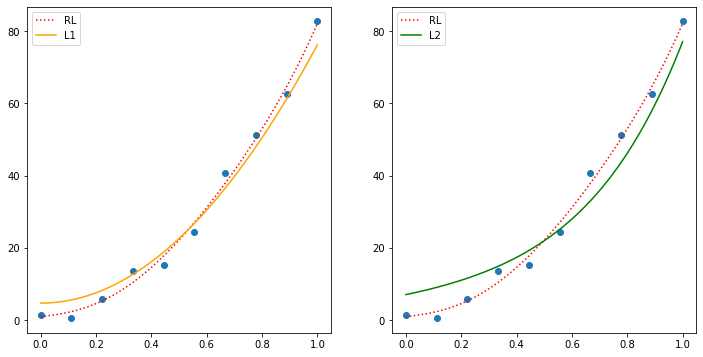

################################################################################

Número original de features: 1
Número de features no espaço transformado: 6

Parâmetros modelo não regularizado:
1.58
[-159.46 2089.08 -8719.98 16998.61 -15254.90 5127.74]

Parâmetros modelo com L1 (Lasso):
4.70
[0.00 71.47 0.00 0.00 0.00 0.00]

Parâmetros modelo com L2 (Ridge):
7.29
[15.55 14.76 12.77 10.96 9.49 8.34]

Modelo treinado:


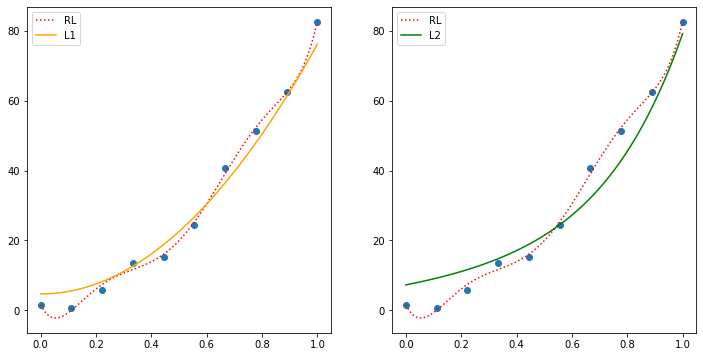

################################################################################

Número original de features: 1
Número de features no espaço transformado: 7

Parâmetros modelo não regularizado:
1.55
[-135.52 1694.08 -6377.54 10375.23 -5596.07 -1881.73 2002.71]

Parâmetros modelo com L1 (Lasso):
4.70
[0.00 71.47 0.00 0.00 0.00 0.00 0.00]

Parâmetros modelo com L2 (Ridge):
7.47
[15.31 14.18 11.95 9.97 8.39 7.15 6.19]

Modelo treinado:


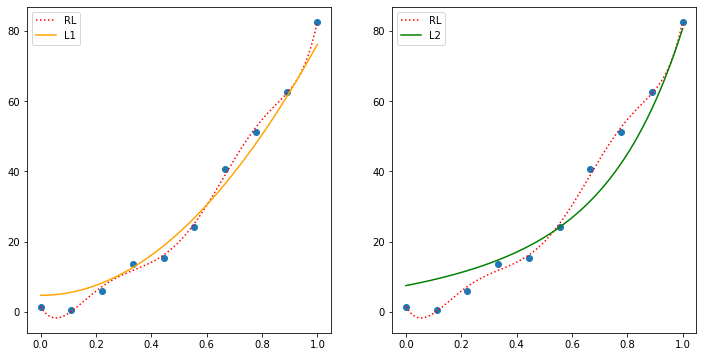

################################################################################

Número original de features: 1
Número de features no espaço transformado: 8

Parâmetros modelo não regularizado:
1.49
[313.57 -7362.48 61932.27 -247319.77 530900.13 -627793.98 385214.28
 -95802.89]

Parâmetros modelo com L1 (Lasso):
4.70
[0.00 71.47 0.00 0.00 0.00 0.00 0.00 0.00]

Parâmetros modelo com L2 (Ridge):
7.59
[15.22 13.87 11.47 9.37 7.70 6.40 5.39 4.60]

Modelo treinado:


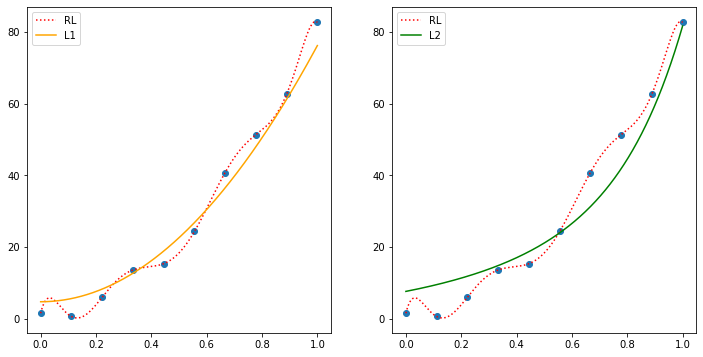

################################################################################

Número original de features: 1
Número de features no espaço transformado: 9

Parâmetros modelo não regularizado:
1.49
[330.45 -7752.35 65443.93 -263817.09 575844.96 -701388.41 456596.31
 -133569.18 8392.51]

Parâmetros modelo com L1 (Lasso):
4.70
[0.00 71.47 0.00 0.00 0.00 0.00 0.00 0.00 0.00]

Parâmetros modelo com L2 (Ridge):
7.66
[15.20 13.70 11.19 9.01 7.27 5.93 4.88 4.06 3.41]

Modelo treinado:


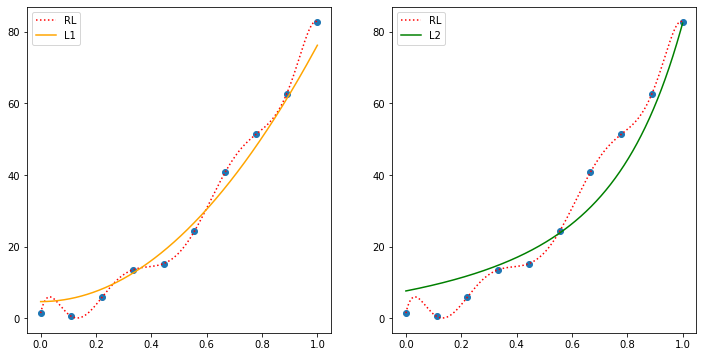

################################################################################

Número original de features: 1
Número de features no espaço transformado: 10

Parâmetros modelo não regularizado:
1.49
[292.63 -6789.65 55546.38 -208846.53 391724.20 -312086.05 -66694.27
 300014.45 -193448.15 40368.13]

Parâmetros modelo com L1 (Lasso):
4.70
[0.00 71.47 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]

Parâmetros modelo com L2 (Ridge):
7.71
[15.19 13.61 11.03 8.79 7.01 5.63 4.55 3.71 3.04 2.51]

Modelo treinado:


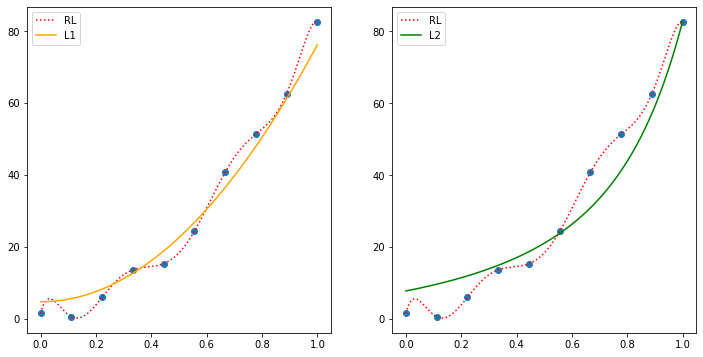

################################################################################



In [9]:
for degree in range(1, 11):
    
    reg_poly_regularized_plot(X, y, degree)
    
    print("#"*80)
    print()

**Lição de casa**: altere a função acima pra ter mais um argumento: alpha.

Daí, varie também o alpha (força de regularização).

_________
Vamos agora voltar pro dataset de precificação de casas!

In [10]:
type_regularization = "l1"
scale_mms = False

if scale_mms or type_regularization:
    print("regulariza")
else:
    print("não regulariza")
    

regulariza


In [20]:
scale_mms = False
type_regularization = "l1"

if scale_mms or type_regularization:
    print("escala!")  
else:
    print("nao escala")

escala!


In [11]:
def reg_lin_poly_features_regularized(X_train, y_train, X_test, y_test, 
                                      deg=1,
                                      type_regularization=None, alpha=1, l1_ratio=0.5,
                                      iter_max=1000,
                                      plot=True, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=True,
                                      plot_model=False):
    '''
    docstring
    - type_regularization: None, "l1", "l2", "en"
    '''
    
    # dimensão dos dados de input
    data_dim = X_train.shape[1]
    
    # é importante salvar os dados originais pra plotá-los!
    # isso é importante pra caso haja transformação no espaço de features
    X_train_orig = X_train.copy()
    X_test_orig = X_test.copy()
    
    if deg > 1:
        
        pf = PolynomialFeatures(degree=deg, include_bias=False).fit(X_train)
        
        X_train = pf.transform(X_train)
        X_test = pf.transform(X_test)
        
        print(f"Modelo com espaço de features transformado!\n")
        print(f"Número de features original: {pf.n_features_in_}")
        print(f"Número de features após o transformer: {pf.n_output_features_}\n")
        print("="*50)
        
    # é importante escalar depois!
    # note que o "or type_regularization" garante que haja normalização 
    # se a regulatrização for usada, mesmo que "scale_mms" seja False ;)
    if scale_mms or type_regularization:

        mms = MinMaxScaler().fit(X_train)

        # não to trazendo o nome das colunas, então não vai mais ter o atributo feature_names_in_!
        # caso queira/precise, tem que alterar a função
        X_train = mms.transform(X_train)
        X_test = mms.transform(X_test)

    # ===============================
    # passo 1 - construção do modelo
    
    if type_regularization == "l1":
        
        model = Lasso(alpha=alpha, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == "l2":
        
        model = Ridge(alpha=alpha, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == "en":
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == None:
    
        model = LinearRegression().fit(X_train, y_train)
        
    else:
        
        list_opcoes = ["l1", "l2", "en", None]
        raise ValueError(f"Opção de regularização indisponível!\nOpções aceitas: {list_opcoes}")


    # ===============================
    # passo 2 - avaliação do modelo
    
    if train_metrics:
        metrics_train = calc_reg_metrics(model, X_train, y_train, label="treino", 
                                         plot=plot, dist_resids=dist_resids, print_stuff=True)
        print()
        print("#"*50)
    else:
        metrics_train = None
        
    metrics_test = calc_reg_metrics(model, X_test, y_test, label="teste",
                                     plot=plot, dist_resids=dist_resids, print_stuff=True)
    
    # só é possível quando temos uma única feature no espaço de features original!
    if plot_model and data_dim == 1:
        # note que passamos as features originais!!
        plot_reglin_model(model, X_train_orig, y_train, X_test_orig, y_test)

    # new: returnando o objeto do modelo treinado!
    return model, metrics_train, metrics_test

In [12]:
df = pd.read_csv("../datasets/house_prices.csv")

X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_model = X_train.select_dtypes(include=np.number).dropna(axis="columns")
X_test_model = X_test.loc[:, X_train_model.columns]

Primeiro, vamos tentar sem regularização, grau 2 (que é o que fizemos na aula passada)

In [13]:
_ = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=2,
                                      type_regularization=None,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 594


Métricas de avaliação (dados de treino):

R^2: 0.96
MAE: 10528.16
RMSE: 14982.18
MAPE: 6.41%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.63
MAE: 27492.21
RMSE: 53406.62
MAPE: 17.87%


In [14]:
_ = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=3,
                                      type_regularization=None,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 7139


Métricas de avaliação (dados de treino):

R^2: 1.00
MAE: 7.11
RMSE: 171.73
MAPE: 0.00%

##################################################

Métricas de avaliação (dados de teste):

R^2: -491.61
MAE: 498602.45
RMSE: 1943827.81
MAPE: 274.35%


E nosso benchmark é o modelo de grau 1 sem regularização:

In [15]:
_ = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=1,
                                      type_regularization=None,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)


Métricas de avaliação (dados de treino):

R^2: 0.80
MAE: 21054.72
RMSE: 34241.17
MAPE: 12.42%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.82
MAE: 22938.25
RMSE: 37312.27
MAPE: 13.45%


Agora, vamos regularizar e ver se conseguimos bater o benchmark!

___________

### L1

In [27]:
_ = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=2,
                                      type_regularization="l1", alpha=50,
                                      iter_max=2000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 594


Métricas de avaliação (dados de treino):

R^2: 0.90
MAE: 16537.05
RMSE: 24506.74
MAPE: 9.62%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.88
MAE: 19070.24
RMSE: 30198.47
MAPE: 11.13%


In [30]:
modelo, _, _ = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=3,
                                      type_regularization="l1", alpha=50,
                                      iter_max=2000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 7139


Métricas de avaliação (dados de treino):

R^2: 0.93
MAE: 14550.68
RMSE: 20633.57
MAPE: 8.53%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.89
MAE: 18155.80
RMSE: 28770.64
MAPE: 10.80%


In [35]:
params = modelo.coef_

In [37]:
np.where(params != 0)

(array([ 114,  593,  598,  643,  678,  843,  873,  926,  943, 1008, 1020,
        1098, 1113, 1219, 1430, 1485, 1508, 1683, 1695, 1698, 1826, 1892,
        1915, 1926, 1933, 1991, 2033, 2048, 2060, 2145, 2167, 2182, 2183,
        2193, 2197, 2202, 2215, 2218, 2268, 2308, 2366, 2384, 2465, 2528,
        2645, 2653, 2660, 2663, 2665, 2671, 2726, 2730, 3016, 3422, 3555,
        3558, 3624, 3702, 3795, 3797, 3827, 3870, 3975, 4063, 4070, 4137,
        4145, 4222, 4223, 4231, 4258, 4303, 4352, 4366, 4386, 4398, 4417,
        4427, 4434, 4448, 4593, 4603, 4708, 4767, 4789, 4803, 4866, 4988,
        5118, 5121, 5122, 5222, 5241, 5295, 5300, 5303, 5681, 5682, 5741,
        5838, 5840, 5879, 5882, 5883, 5884, 5937, 5958, 5994, 5996, 6067,
        6098, 6132, 6170, 6194, 6285, 6412, 6447, 6504, 6512, 6582, 6618,
        6875, 6911, 6916, 7135, 7138], dtype=int64),)

In [41]:
np.where(params != 0)[0].shape

(126,)

___________
### L2

In [28]:
_ = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=2,
                                      type_regularization="l2", alpha=1,
                                      iter_max=2000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 594


Métricas de avaliação (dados de treino):

R^2: 0.92
MAE: 14698.38
RMSE: 21682.32
MAPE: 8.53%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.88
MAE: 18773.70
RMSE: 30914.00
MAPE: 11.08%


In [29]:
_ = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=3,
                                      type_regularization="l2", alpha=10,
                                      iter_max=2000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 7139


Métricas de avaliação (dados de treino):

R^2: 0.94
MAE: 13307.51
RMSE: 19182.28
MAPE: 7.84%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.88
MAE: 18651.75
RMSE: 30706.72
MAPE: 10.99%


### Elastic Net

In [42]:
_ = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=2,
                                      type_regularization="en", alpha=0.1, l1_ratio=0.8,
                                      iter_max=2000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 594


Métricas de avaliação (dados de treino):

R^2: 0.85
MAE: 18711.61
RMSE: 30008.38
MAPE: 10.65%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.84
MAE: 20734.75
RMSE: 34656.09
MAPE: 11.78%


_____

Uma pergunta importante é: **como selecionar um valor adequado para os parâmetros de regularização?**

Naturalmente, este é um hiperarâmetro bastante importante, dado que ele controla a "força" da regularização a ser aplicada.

E, no caso do elastic net, o parâmetro de mistura também é muito relevante!

Uma abordagem para a escolha de valores adequados de hiperparâmetros (processo chamado de **hyperparameter tuning**) é testar exaustivamente vários valores com o processo de **validação cruzada**, de modo a encontrarmos os melhores valores (e/ou combinação de valores) de hiperparâmetros.

Antes de nos aprofundarmos no processo de tuning, vamos entender melhor o que é a validação cruzada!

E esse será o primeiro tópico abordado no módulo que vem!

Este módulo, terminamos por aqui!